# Problem-2 (Canonical correlation analysis using Python using simulation data)

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
#create synthetic dataset
np.random.seed(42)

# Group X (psychological scores)
X1 = np.random.normal(size=(100, 3))  # 3 variables for 100 samples
X2 = np.random.normal(size=(100, 1))  # 1 variable for 100 samples
X = np.hstack((X1, X2))               # Combine into a 100x4 matrix



# Group Y (physiological scores)
Y = X @ np.array([[0.4, 0.3],
                  [0.2, 0.4],
                  [0.3, 0.1],
                  [0.1, 0.3]]) + np.random.normal(size=(100, 2))


Here:
* We are generating 4 variables for dataset X
* We are generating 2 variables for dataset Y

In [3]:
# Convert to DataFrames
df_X = pd.DataFrame(X, columns=["Psych1", "Psych2", "Psych3", "Psych4"])
df_Y = pd.DataFrame(Y, columns=["Physio1", "Physio2"])


In [4]:
#standazdize the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(df_X)
Y_scaled = scaler_Y.fit_transform(df_Y)


In [5]:
#Fit CCA model
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X_scaled, Y_scaled)


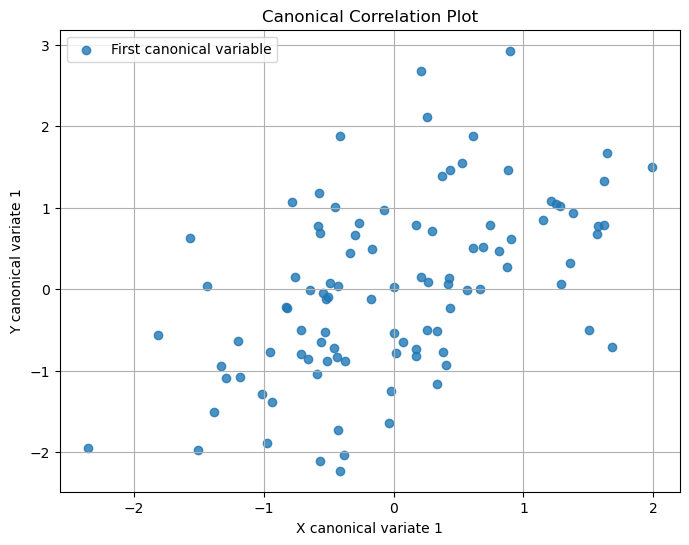

In [6]:
#Plot the Canonical Variates 

plt.figure(figsize=(8, 6))
plt.scatter(X_c[:, 0], Y_c[:, 0], label="First canonical variable", alpha=0.8)
plt.xlabel("X canonical variate 1")
plt.ylabel("Y canonical variate 1")
plt.title("Canonical Correlation Plot")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
#Canonical correlation coefficients 
canonical_corrs = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(2)]
print("Canonical Correlations:", canonical_corrs)


Canonical Correlations: [0.5117927809706396, 0.3526170085969548]


The canonical correlation analysis yielded two canonical correlations: **0.5118** and **0.3526**.  
The first canonical variate pair, with a correlation of approximately **51.2%**, represents the strongest relationship between the two variable sets, indicating that about **26%** (\(R^2 = 0.2619\)) of the variance in one canonical variate is explained by the other.  
The second canonical variate pair has a weaker correlation of about **35.3%**, corresponding to roughly **12%** (\(R^2 = 0.1243\)) shared variance, suggesting that it captures less of the common structure between the datasets compared to the first pair.
